1. Tabela com: país de origem (Brasil), país de destino, quantidade em litros de vinho importado (1kg = 1l), valor em US$.
2. montante de venda de exportação nos últimos 15 anos - análise por país, prospecções futuras, possíveis ações para melhoria de exportações

##**1. Limpeza e organização do df**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv("ExpVinho.csv", sep=';')

In [ ]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados.columns

Index(['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1',
       '1973', '1973.1',
       ...
       '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1',
       '2021', '2021.1'],
      dtype='object', length=106)

In [ ]:
dados.dropna(inplace = True)


In [ ]:
dados.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
3,4,Angola,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(dados.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
119    False
120    False
121    False
122    False
123    False
Length: 124, dtype: bool


In [ ]:
dados.dtypes

Id         int64
País      object
1970       int64
1970.1     int64
1971       int64
           ...  
2019.1     int64
2020       int64
2020.1     int64
2021       int64
2021.1     int64
Length: 106, dtype: object

In [ ]:
dados = dados.set_index("País")

In [ ]:
dados

,Id,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",3,0,0,0,0,4168,2630,12000,8250,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,4,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
Uruguai,121,0,0,0,0,0,0,0,0,0,...,0,0,7711,29617,6180,18497,0,0,136774,149842
Vanuatu,122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,31,0,0


In [ ]:
dados = dados.drop("Id", axis=1)

In [ ]:
dados.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,0,0,0,0,0,0,0,0,0,0,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados.columns[-32:]

Index(['2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1',
       '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1',
       '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1',
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'],
      dtype='object')

In [ ]:
dados_usaveis = dados[['2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1']]
#pegar somente os últimos 15 anos

In [ ]:
dados_usaveis

,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,0,0,7711,29617,6180,18497,0,0,136774,149842
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,31,0,0


In [ ]:
dados_usaveis.columns = ['2006 (lt)', 'total_06 (US)', '2007 (lt)', 'total_07 (US)', '2008 (lt)', 'total_08 (US)', '2009 (lt)', 'total_09 (US)', '2010 (lt)', 'total_10 (US)', '2011 (lt)', 'total_11 (US)', '2012 (lt)', 'total_12 (US)', '2013 (lt)', 'total_13 (US)', '2014 (lt)', 'total_14 (US)', '2015 (lt)', 'total_15 (US)', '2016 (lt)', 'total_16 (US)', '2017 (lt)', 'total_17 (US)', '2018 (lt)', 'total_18 (US)', '2019 (lt)', 'total_19 (US)', '2020 (lt)', 'total_20 (US)', '2021 (lt)', 'total_21 (US)']
#renomear colunas


In [ ]:
dados_usaveis

,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,2017 (lt),total_17 (US),2018 (lt),total_18 (US),2019 (lt),total_19 (US),2020 (lt),total_20 (US),2021 (lt),total_21 (US)
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,10170,61680,477,709,345,1065,0,0,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,4,0,0
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,0,0,7711,29617,6180,18497,0,0,136774,149842
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,31,0,0


In [ ]:
dados_usaveis['total'] = dados_usaveis.sum(axis=1, numeric_only=True)  #criar coluna total
dados_usaveis

<ipython-input-18-c8df702a54fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_usaveis['total'] = dados_usaveis.sum(axis=1, numeric_only=True)  #criar coluna total


,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,total_17 (US),2018 (lt),total_18 (US),2019 (lt),total_19 (US),2020 (lt),total_20 (US),2021 (lt),total_21 (US),total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,46,57
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,26,95,4,21,0,0,146
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,87702,10794,45382,3660,25467,6261,32605,2698,6741,3887545
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,61680,477,709,345,1065,0,0,0,0,833971
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,6
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,0,7711,29617,6180,18497,0,0,136774,149842,380682
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,31,0,0,49


In [ ]:
dados_usaveis = dados_usaveis.drop(dados_usaveis[dados_usaveis.total == 0].index)   #dropar linhas onde o total = 0
dados_usaveis

,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,total_17 (US),2018 (lt),total_18 (US),2019 (lt),total_19 (US),2020 (lt),total_20 (US),2021 (lt),total_21 (US),total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,46,57
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,26,95,4,21,0,0,146
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,87702,10794,45382,3660,25467,6261,32605,2698,6741,3887545
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,61680,477,709,345,1065,0,0,0,0,833971
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,37,191,219,1549,624,1864,805,2268,7557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,6
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,0,7711,29617,6180,18497,0,0,136774,149842,380682
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,31,0,0,49


In [ ]:
producao = dados_usaveis[['2006 (lt)', '2007 (lt)', '2008 (lt)', '2009 (lt)', '2010 (lt)', '2011 (lt)', '2012 (lt)', '2013 (lt)', '2014 (lt)', '2015 (lt)', '2016 (lt)', '2017 (lt)', '2018 (lt)', '2019 (lt)', '2020 (lt)', '2021 (lt)']]
#criar df de producao em litros

In [ ]:
producao

,2006 (lt),2007 (lt),2008 (lt),2009 (lt),2010 (lt),2011 (lt),2012 (lt),2013 (lt),2014 (lt),2015 (lt),2016 (lt),2017 (lt),2018 (lt),2019 (lt),2020 (lt),2021 (lt)
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0
"Alemanha, República Democrática",38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698
Angola,3766,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,37,219,624,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Uruguai,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0


In [ ]:
producao.describe().round(2)

,2006 (lt),2007 (lt),2008 (lt),2009 (lt),2010 (lt),2011 (lt),2012 (lt),2013 (lt),2014 (lt),2015 (lt),2016 (lt),2017 (lt),2018 (lt),2019 (lt),2020 (lt),2021 (lt)
count,114.00,114.0,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,29958.91,28787.3,90757.22,223808.75,11233.11,10656.44,50661.19,80254.90,20386.22,10512.97,15671.48,25347.12,33825.98,27656.78,38681.73,70690.39
std,190154.01,135427.3,616190.97,2055486.83,54815.28,40733.70,425255.96,581477.15,68343.70,51249.97,96426.11,224353.74,302990.95,227384.60,311763.33,613288.22
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,21.00,77.00
75%,307.75,2109.0,2815.75,1302.00,792.00,2105.75,1550.25,1482.00,3130.00,687.00,585.00,643.25,3570.25,1482.00,1812.25,2616.50
max,1947106.00,1285459.0,6207658.00,21912914.00,510989.00,306787.00,4528176.00,5893291.00,521847.00,495428.00,985739.00,2393468.00,3234168.00,2419537.00,3299013.00,6522527.00


In [ ]:
producao['total'] = dados_usaveis.sum(axis=1, numeric_only=True)  #criar coluna total
producao

<ipython-input-23-ad219f131095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producao['total'] = dados_usaveis.sum(axis=1, numeric_only=True)  #criar coluna total


,2006 (lt),2007 (lt),2008 (lt),2009 (lt),2010 (lt),2011 (lt),2012 (lt),2013 (lt),2014 (lt),2015 (lt),2016 (lt),2017 (lt),2018 (lt),2019 (lt),2020 (lt),2021 (lt),total
País,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,114
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0,292
"Alemanha, República Democrática",38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7775090
Angola,3766,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,1667942
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,37,219,624,805,15114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,12
Uruguai,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,761364
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,98


In [ ]:
producao = producao.sort_values(by=["total"], ascending=False)
producao

,2006 (lt),2007 (lt),2008 (lt),2009 (lt),2010 (lt),2011 (lt),2012 (lt),2013 (lt),2014 (lt),2015 (lt),2016 (lt),2017 (lt),2018 (lt),2019 (lt),2020 (lt),2021 (lt),total
País,,,,,,,,,,,,,,,,,
Rússia,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,130576246
Paraguai,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,121217116
Estados Unidos,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,29706564
China,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,13567938
Reino Unido,38281,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,12221980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belice,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,76
Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,68
Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,68


In [ ]:
producao.columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'total']


In [ ]:
producao

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
País,,,,,,,,,,,,,,,,,
Rússia,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931,130576246
Paraguai,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527,121217116
Estados Unidos,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085,29706564
China,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884,13567938
Reino Unido,38281,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316,12221980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belice,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,76
Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,68
Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,68


In [ ]:
prod_sem_total = producao.drop("total", axis=1)   #dropar coluna total pra usar em gráficos
prod_sem_total

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Rússia,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931
Paraguai,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527
Estados Unidos,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085
China,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884
Reino Unido,38281,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295,22913,25316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Belice,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0
Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0


In [ ]:
total_US = dados_usaveis[['total_06 (US)', 'total_07 (US)', 'total_08 (US)', 'total_09 (US)', 'total_10 (US)', 'total_11 (US)', 'total_12 (US)', 'total_13 (US)', 'total_14 (US)', 'total_15 (US)', 'total_16 (US)', 'total_17 (US)', 'total_18 (US)', 'total_19 (US)', 'total_20 (US)', 'total_21 (US)']]
total_US
#criar df com totais em US$

,total_06 (US),total_07 (US),total_08 (US),total_09 (US),total_10 (US),total_11 (US),total_12 (US),total_13 (US),total_14 (US),total_15 (US),total_16 (US),total_17 (US),total_18 (US),total_19 (US),total_20 (US),total_21 (US)
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
"Alemanha, República Democrática",89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
Angola,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
Uruguai,1685,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0


In [ ]:
total_US.describe().round(2)

,total_06 (US),total_07 (US),total_08 (US),total_09 (US),total_10 (US),total_11 (US),total_12 (US),total_13 (US),total_14 (US),total_15 (US),total_16 (US),total_17 (US),total_18 (US),total_19 (US),total_20 (US),total_21 (US)
count,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
mean,23316.73,32334.65,62439.47,78429.72,22765.82,31711.58,48432.39,199516.18,65550.83,24290.88,38900.91,62593.04,65667.22,52059.88,53318.32,86420.54
std,105466.57,119090.23,275445.68,542851.79,76925.58,114399.05,217722.34,1427177.27,204079.00,93566.15,180034.77,424118.46,516314.06,363770.19,369248.75,677402.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.50,103.50,166.00
75%,1512.75,3709.50,10622.50,4235.25,2786.25,7048.50,8526.00,5668.25,13252.00,2258.75,3288.75,2783.25,11475.25,4296.25,6408.00,8453.00
max,873636.00,810038.00,2352768.00,5732280.00,478630.00,1030254.00,2103968.00,14795694.00,1373747.00,741370.00,1655417.00,4274650.00,5494321.00,3826587.00,3869243.00,7192362.00


In [ ]:
total_US['total'] = total_US.sum(axis=1, numeric_only=True)  #criar coluna total
total_US

<ipython-input-30-9f238d77941e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_US['total'] = total_US.sum(axis=1, numeric_only=True)  #criar coluna total


,total_06 (US),total_07 (US),total_08 (US),total_09 (US),total_10 (US),total_11 (US),total_12 (US),total_13 (US),total_14 (US),total_15 (US),total_16 (US),total_17 (US),total_18 (US),total_19 (US),total_20 (US),total_21 (US),total
País,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,46
África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0,116
"Alemanha, República Democrática",89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2828310
Angola,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,639474
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,5872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,4
Uruguai,1685,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,224196
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0,31


In [ ]:
total_US = total_US.sort_values(by=["total"], ascending=False)

In [ ]:
total_US.columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', 'total']


In [ ]:
total_US

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
País,,,,,,,,,,,,,,,,,
Paraguai,873636,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,33237893
Rússia,164744,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25723770
Estados Unidos,591729,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,10638441
Reino Unido,49826,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4767380
China,0,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4372268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,25
Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,24
Nicaragua,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,24


In [ ]:
totalUS_sem_total = total_US.drop("total", axis=1) #dropar coluna total pra usar em gráficos
totalUS_sem_total

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Paraguai,873636,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362
Rússia,164744,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926
Estados Unidos,591729,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554
Reino Unido,49826,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394
China,0,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Comores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0
Suazilândia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
Nicaragua,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_usaveis

,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,total_17 (US),2018 (lt),total_18 (US),2019 (lt),total_19 (US),2020 (lt),total_20 (US),2021 (lt),total_21 (US),total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,46,57
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,26,95,4,21,0,0,146
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,87702,10794,45382,3660,25467,6261,32605,2698,6741,3887545
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,61680,477,709,345,1065,0,0,0,0,833971
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,37,191,219,1549,624,1864,805,2268,7557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,4,0,0,6
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,0,7711,29617,6180,18497,0,0,136774,149842,380682
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18,31,0,0,49


In [ ]:
valor_litro = dados_usaveis.assign (
    US_lt_06 = dados_usaveis["total_06 (US)"] / dados_usaveis["2006 (lt)"],
    US_lt_07 = dados_usaveis["total_07 (US)"] / dados_usaveis["2007 (lt)"],
    US_lt_08 = dados_usaveis["total_08 (US)"] / dados_usaveis["2008 (lt)"],
    US_lt_09 = dados_usaveis["total_09 (US)"] / dados_usaveis["2009 (lt)"],
    US_lt_10 = dados_usaveis["total_10 (US)"] / dados_usaveis["2010 (lt)"],
    US_lt_11 = dados_usaveis["total_11 (US)"] / dados_usaveis["2011 (lt)"],
    US_lt_12 = dados_usaveis["total_12 (US)"] / dados_usaveis["2012 (lt)"],
    US_lt_13 = dados_usaveis["total_13 (US)"] / dados_usaveis["2013 (lt)"],
    US_lt_14 = dados_usaveis["total_14 (US)"] / dados_usaveis["2014 (lt)"],
    US_lt_15 = dados_usaveis["total_15 (US)"] / dados_usaveis["2015 (lt)"],
    US_lt_16 = dados_usaveis["total_16 (US)"] / dados_usaveis["2016 (lt)"],
    US_lt_17 = dados_usaveis["total_17 (US)"] / dados_usaveis["2017 (lt)"],
    US_lt_18 = dados_usaveis["total_18 (US)"] / dados_usaveis["2018 (lt)"],
    US_lt_19 = dados_usaveis["total_19 (US)"] / dados_usaveis["2019 (lt)"],
    US_lt_20 = dados_usaveis["total_20 (US)"] / dados_usaveis["2020 (lt)"],
    US_lt_21 = dados_usaveis["total_21 (US)"] / dados_usaveis["2021 (lt)"],
)

In [ ]:
valor_litro

,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,US_lt_12,US_lt_13,US_lt_14,US_lt_15,US_lt_16,US_lt_17,US_lt_18,US_lt_19,US_lt_20,US_lt_21
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181818
África do Sul,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.653846,5.250000,NaN
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,NaN,NaN
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.162162,7.073059,2.987179,2.817391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,3.417621,8.743775,NaN,NaN,NaN,NaN,3.840877,2.993042,NaN,1.095544
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.722222,NaN


In [ ]:
valor_litro.columns[-16:]

Index(['US_lt_06', 'US_lt_07', 'US_lt_08', 'US_lt_09', 'US_lt_10', 'US_lt_11',
       'US_lt_12', 'US_lt_13', 'US_lt_14', 'US_lt_15', 'US_lt_16', 'US_lt_17',
       'US_lt_18', 'US_lt_19', 'US_lt_20', 'US_lt_21'],
      dtype='object')

In [ ]:
valor_por_litro = valor_litro.filter(['US_lt_06', 'US_lt_07', 'US_lt_08', 'US_lt_09', 'US_lt_10', 'US_lt_11',
       'US_lt_12', 'US_lt_13', 'US_lt_14', 'US_lt_15', 'US_lt_16', 'US_lt_17',
       'US_lt_18', 'US_lt_19', 'US_lt_20', 'US_lt_21'], axis=1)

In [ ]:
valor_por_litro.head(30)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Afeganistão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.181818
África do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.653846,5.250000,NaN
"Alemanha, República Democrática",2.329669,1.991867,1.617998,1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517
Angola,4.857408,1.918669,2.763617,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,NaN,NaN
Antígua e Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.162162,7.073059,2.987179,2.817391
Antilhas Holandesas,1.277412,1.054273,1.277065,1.293382,1.305607,1.388957,1.522764,1.734332,1.609203,1.583333,1.589448,1.583333,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,27.919753,NaN,4.184713,NaN,NaN,4.666667,NaN,NaN,NaN,3.764878,NaN,4.114286,2.166667
Aruba,NaN,NaN,NaN,NaN,NaN,1.866667,NaN,NaN,1.677778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austrália,NaN,4.683333,0.453901,9.068047,9.851892,11.207048,5.997325,6.088167,6.929138,6.455695,7.061924,5.555556,3.358637,4.032730,3.369200,5.721986


In [ ]:
valor_por_litro.columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [ ]:
razao = dados_usaveis.assign (
    total_lt = producao["total"],
    total_US = total_US["total"],
    razao = total_US["total"] / producao["total"]
)
razao

,2006 (lt),total_06 (US),2007 (lt),total_07 (US),2008 (lt),total_08 (US),2009 (lt),total_09 (US),2010 (lt),total_10 (US),...,2019 (lt),total_19 (US),2020 (lt),total_20 (US),2021 (lt),total_21 (US),total,total_lt,total_US,razao
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,57,114,46,0.403509
África do Sul,0,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,146,292,116,0.397260
"Alemanha, República Democrática",38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,...,3660,25467,6261,32605,2698,6741,3887545,7775090,2828310,0.363766
Angola,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,...,345,1065,0,0,0,0,833971,1667942,639474,0.383391
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,...,219,1549,624,1864,805,2268,7557,15114,5872,0.388514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,...,0,0,2,4,0,0,6,12,4,0.333333
Uruguai,1008,1685,0,0,0,0,0,0,914,2929,...,6180,18497,0,0,136774,149842,380682,761364,224196,0.294466
Vanuatu,0,0,0,0,0,0,0,0,0,0,...,0,0,18,31,0,0,49,98,31,0.316327


In [ ]:
razao = razao.filter(["total_lt", "total_US", "razao"], axis=1)
razao

,total_lt,total_US,razao
País,,,
Afeganistão,114,46,0.403509
África do Sul,292,116,0.397260
"Alemanha, República Democrática",7775090,2828310,0.363766
Angola,1667942,639474,0.383391
Antígua e Barbuda,15114,5872,0.388514
...,...,...,...
Tuvalu,12,4,0.333333
Uruguai,761364,224196,0.294466
Vanuatu,98,31,0.316327


talvez coluna / coluna - 1 ?

def criar_coluna(coluna)
  df[coluna_nova] = df.[coluna] / df.[coluna] - 1  
  #pensei em posição da coluna menos 1

obs: tem uma funcao assign pra colocar mais de uma coluna de uma vez

##**2. Plotar gráficos com os dataframes: producao, total US, razao, valor_por_litro**

In [ ]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Produção (Lt)

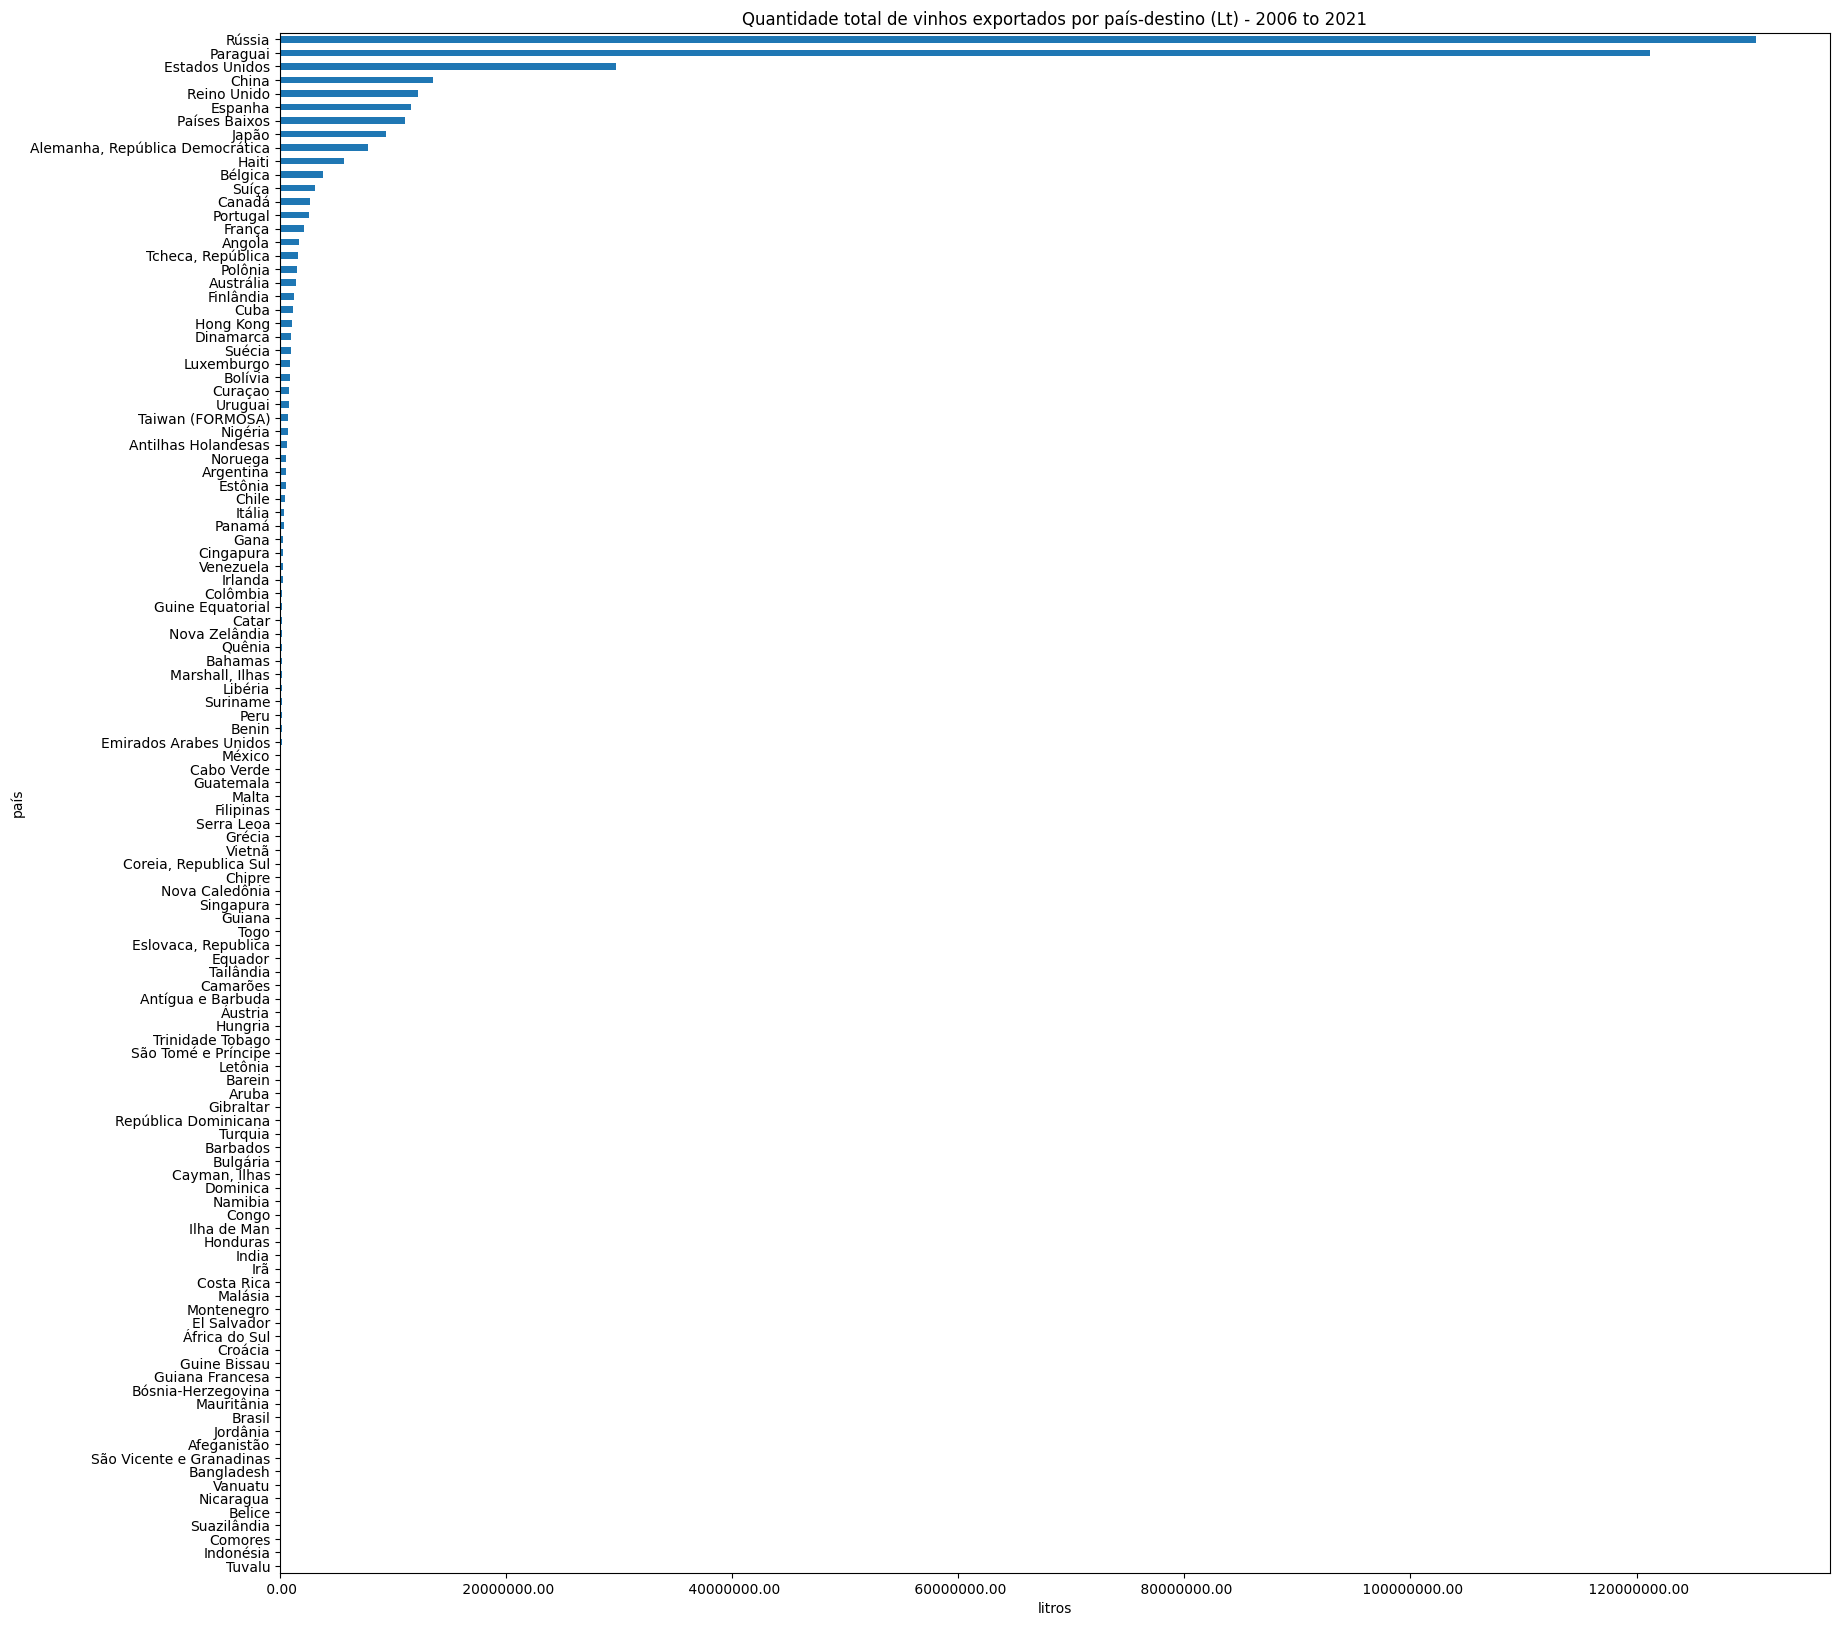

In [ ]:
ax = producao['total'].plot(kind='barh', figsize=(20,20), title="Quantidade total de vinhos exportados por país-destino (Lt) - 2006 to 2021", xlabel="litros", ylabel="país", fontsize=10)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x: .2f}"))

Text(0.5, 1.0, 'Quantidade total de vinhos exportados por país-destino (Lt) - 2006 a 2021')

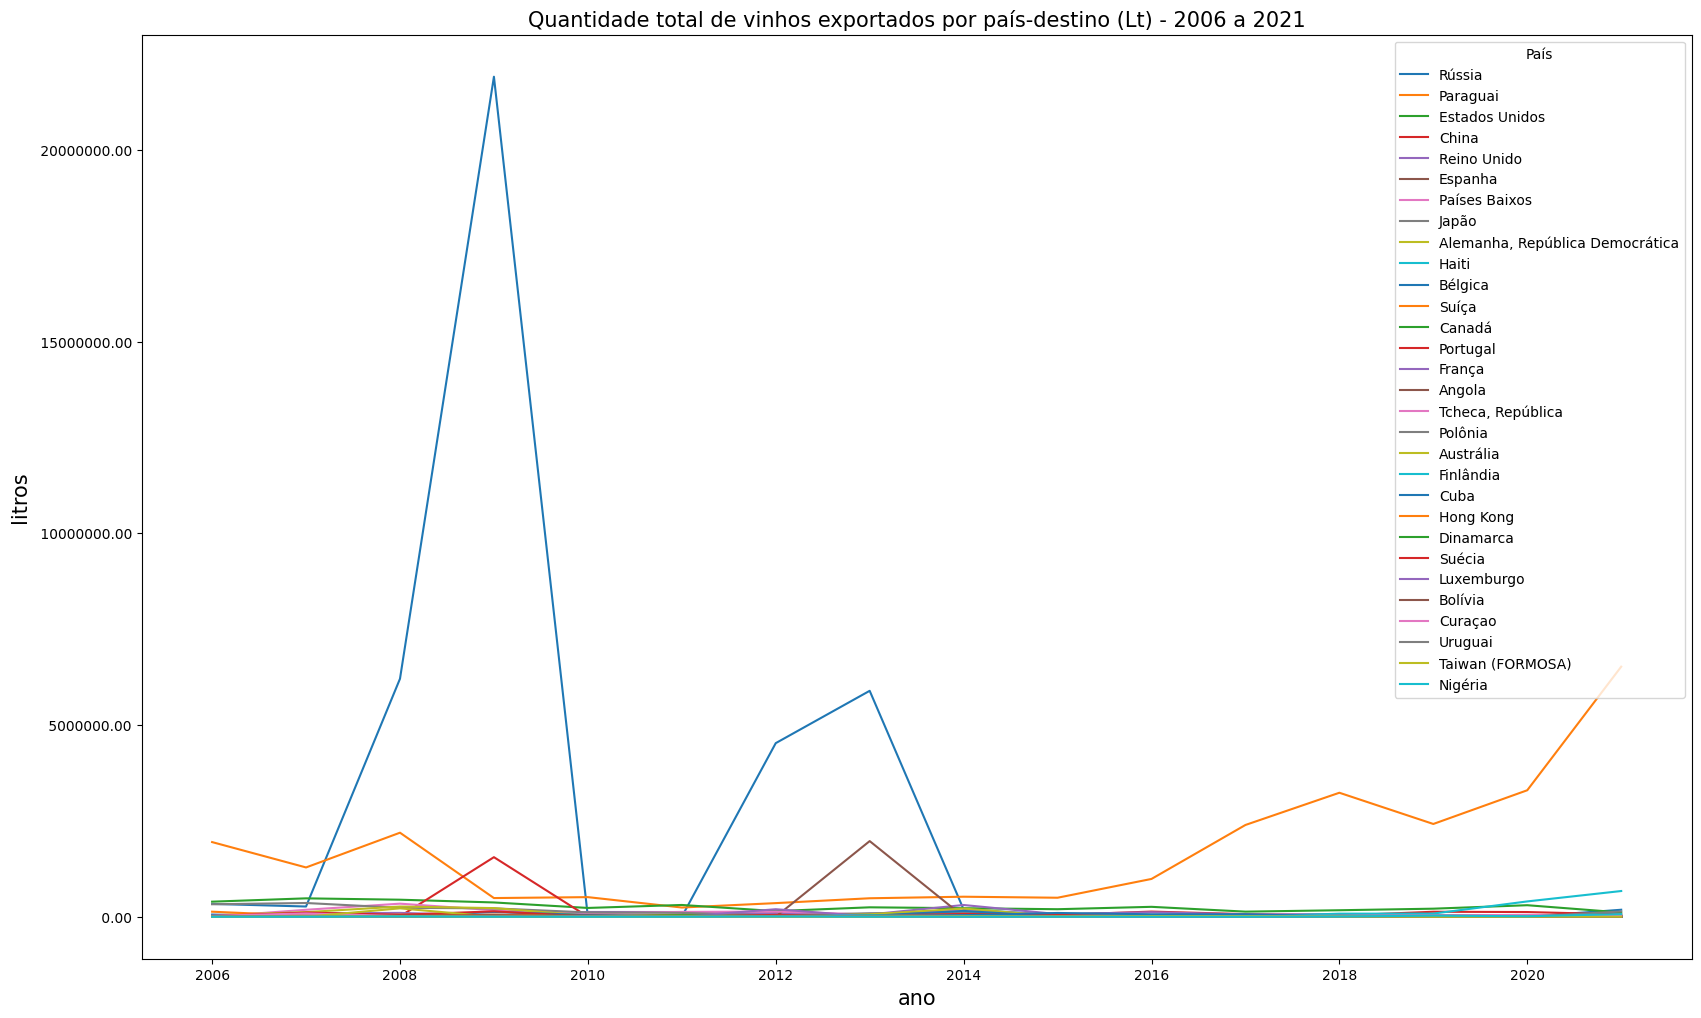

In [ ]:
ax = prod_sem_total.head(30).T.plot(figsize=(20, 12))   #plotar gráfico e mudar Y label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x: .2f}"))
ax.set_ylabel("litros", fontsize=15)
ax.set_xlabel("ano", fontsize=15)
ax.set_title("Quantidade total de vinhos exportados por país-destino (Lt) - 2006 a 2021", fontsize=15)


#Montante (US$)

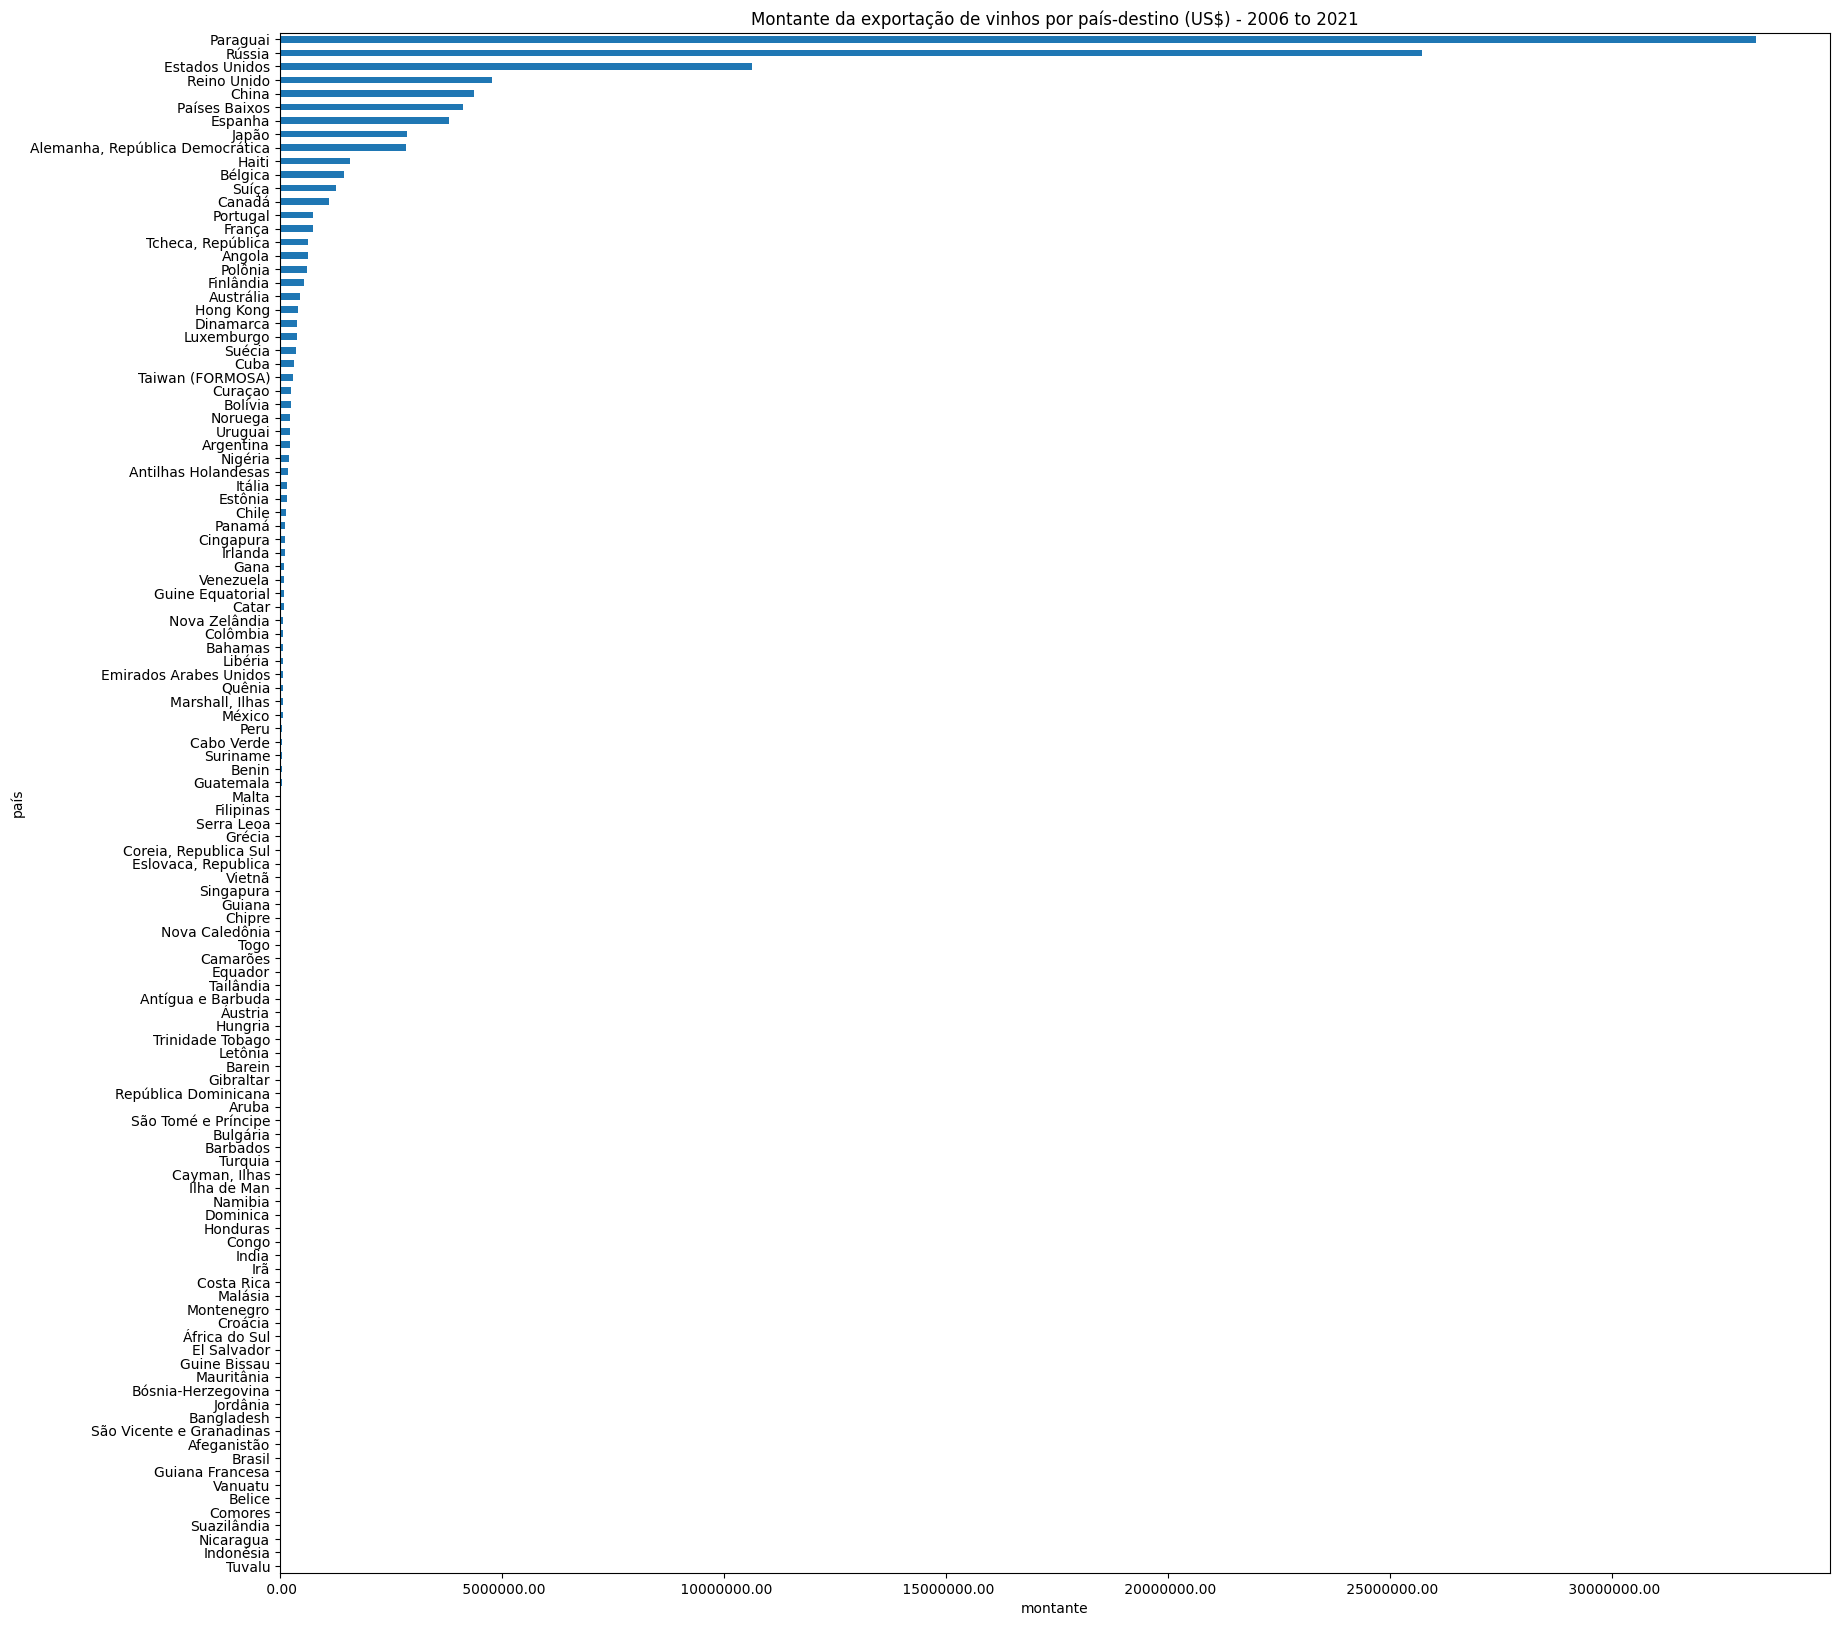

In [ ]:
ax = total_US['total'].plot(x=total_US.index, kind='barh', figsize=(20,20), title="Montante da exportação de vinhos por país-destino (US$) - 2006 to 2021", xlabel="montante", ylabel="país", fontsize=10)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x: .2f}"))

Text(0.5, 1.0, 'Valor de exportação de vinhos por país destino (US$) - 2006 a 2021')

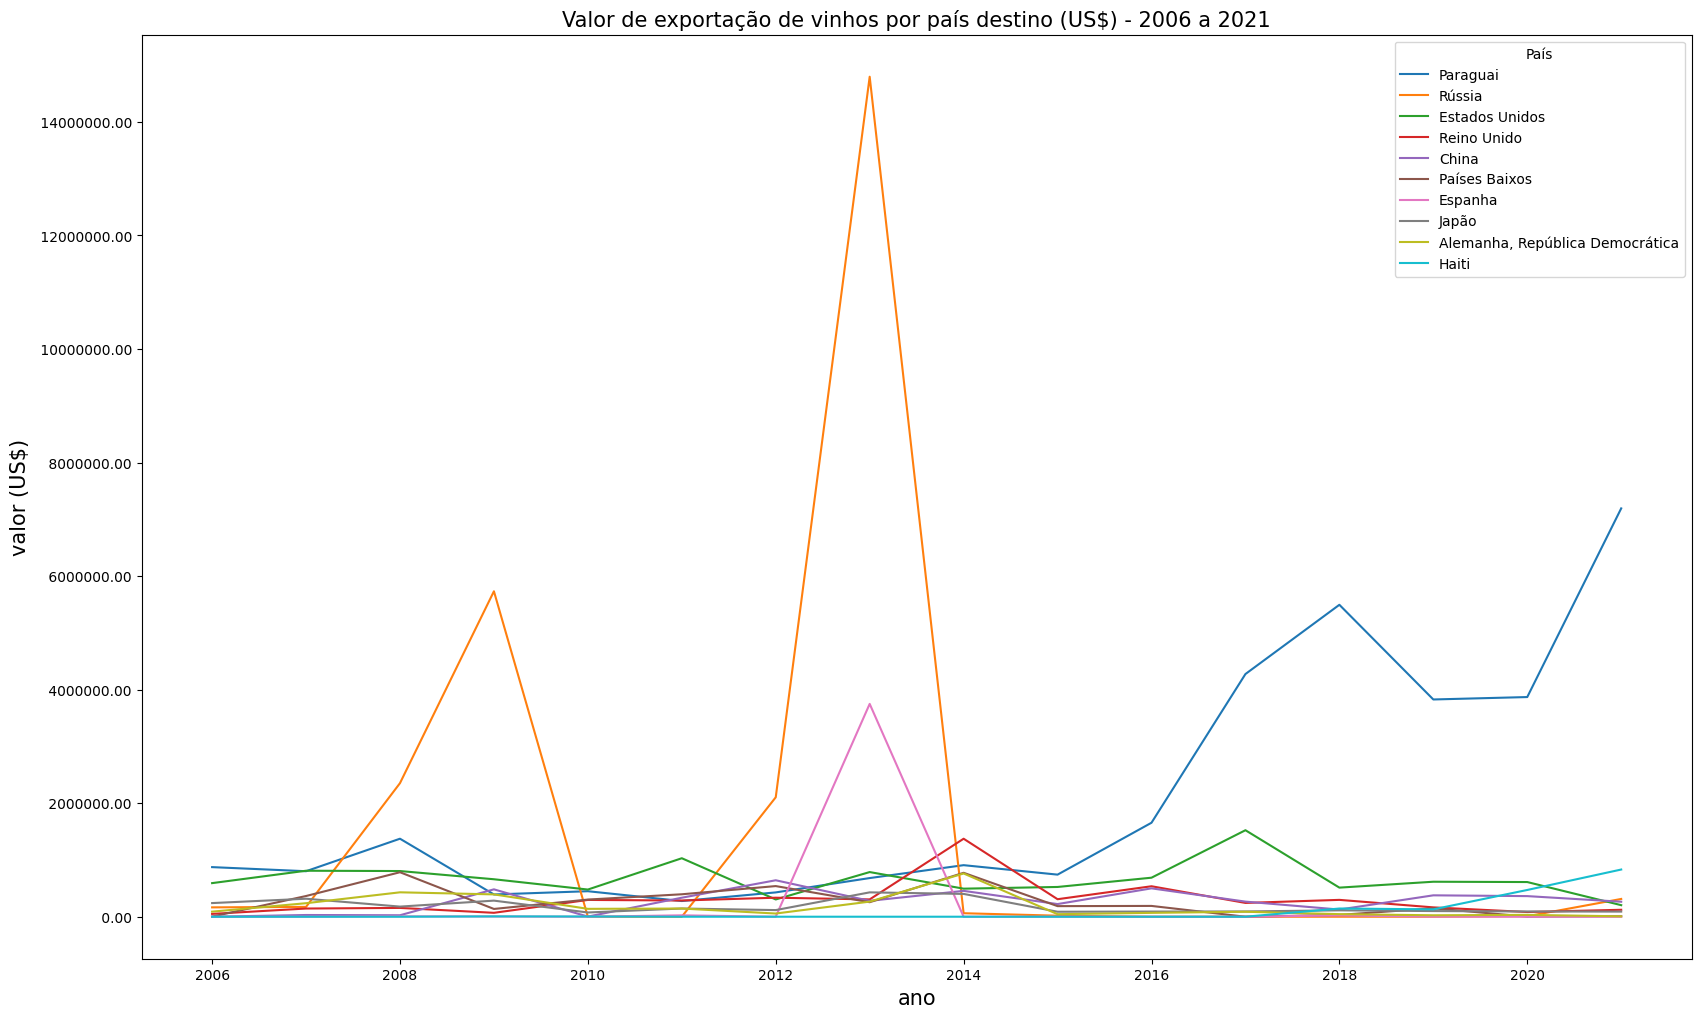

In [ ]:
ax = totalUS_sem_total.head(10).T.plot(figsize=(20, 12))   #plotar gráfico e mudar Y label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x: .2f}"))
ax.set_ylabel("valor (US$)", fontsize=15)
ax.set_xlabel("ano", fontsize=15)
ax.set_title("Valor de exportação de vinhos por país destino (US$) - 2006 a 2021", fontsize=15)

#Valor por litro (US$)

Text(0.5, 1.0, 'Valor por litro por país (US$) - 2006 a 2021')

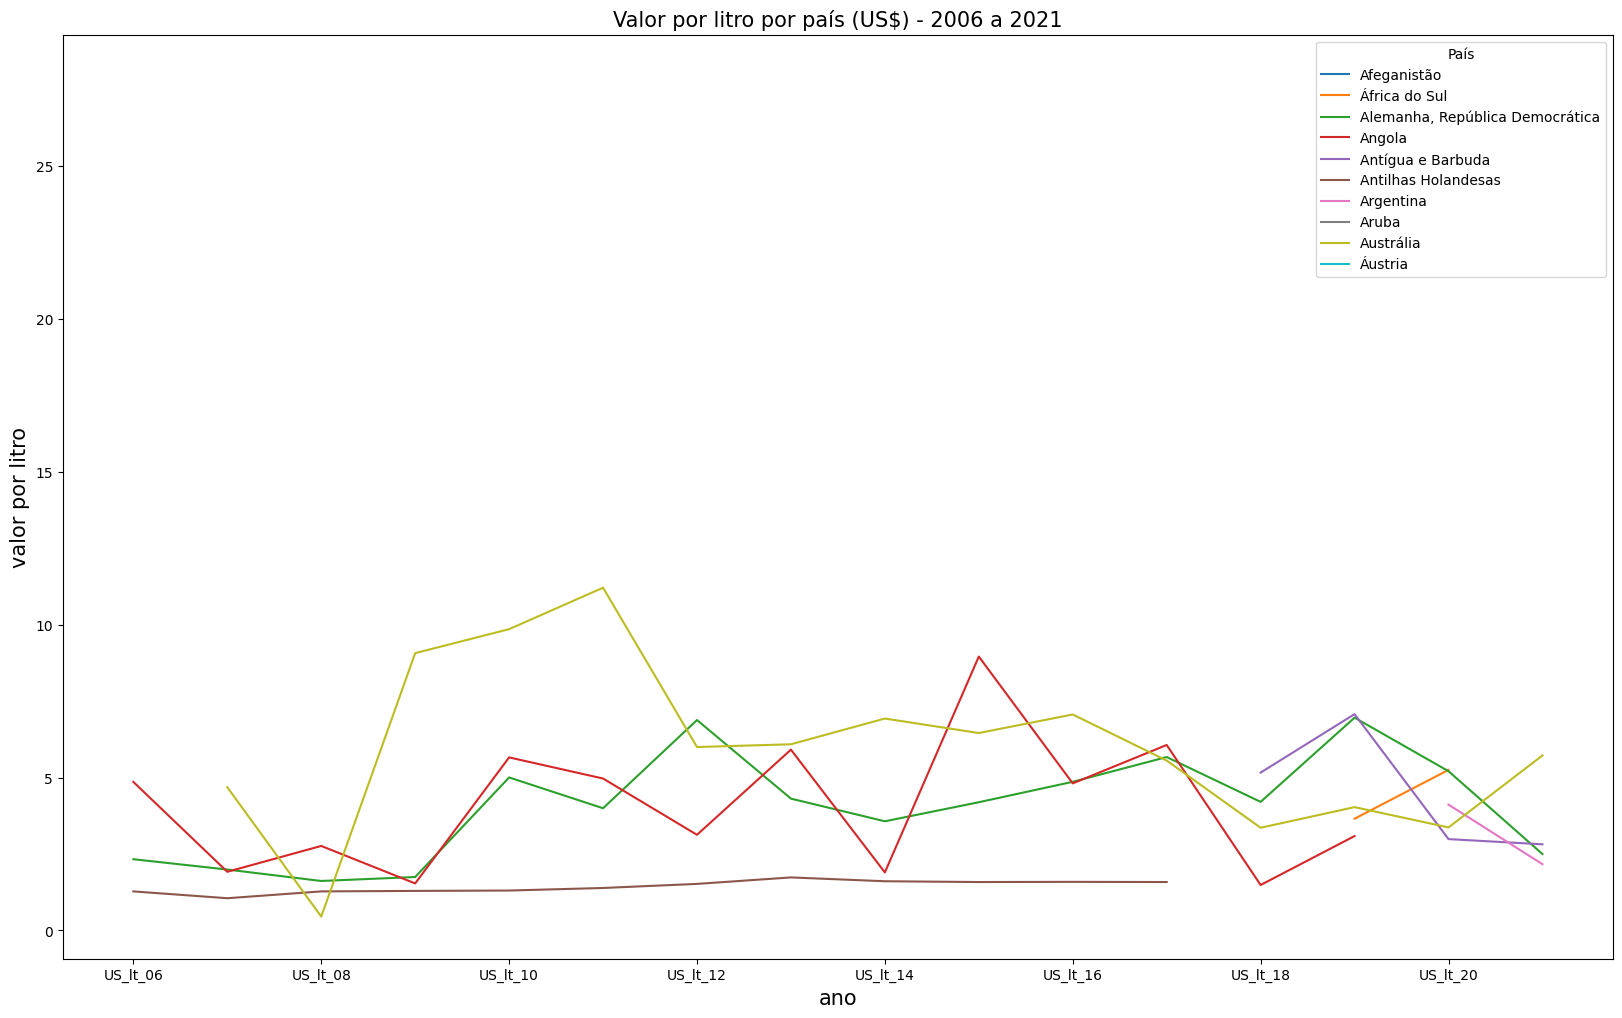

In [ ]:
ax = valor_por_litro.head(10).T.plot(figsize=(20, 12))   #plotar gráfico e mudar Y label
ax.set_ylabel("valor por litro", fontsize=15)
ax.set_xlabel("ano", fontsize=15)
ax.set_title("Valor por litro por país (US$) - 2006 a 2021", fontsize=15)

Text(0.5, 1.0, 'Valor por litro por país (US$) - 2006 a 2021')

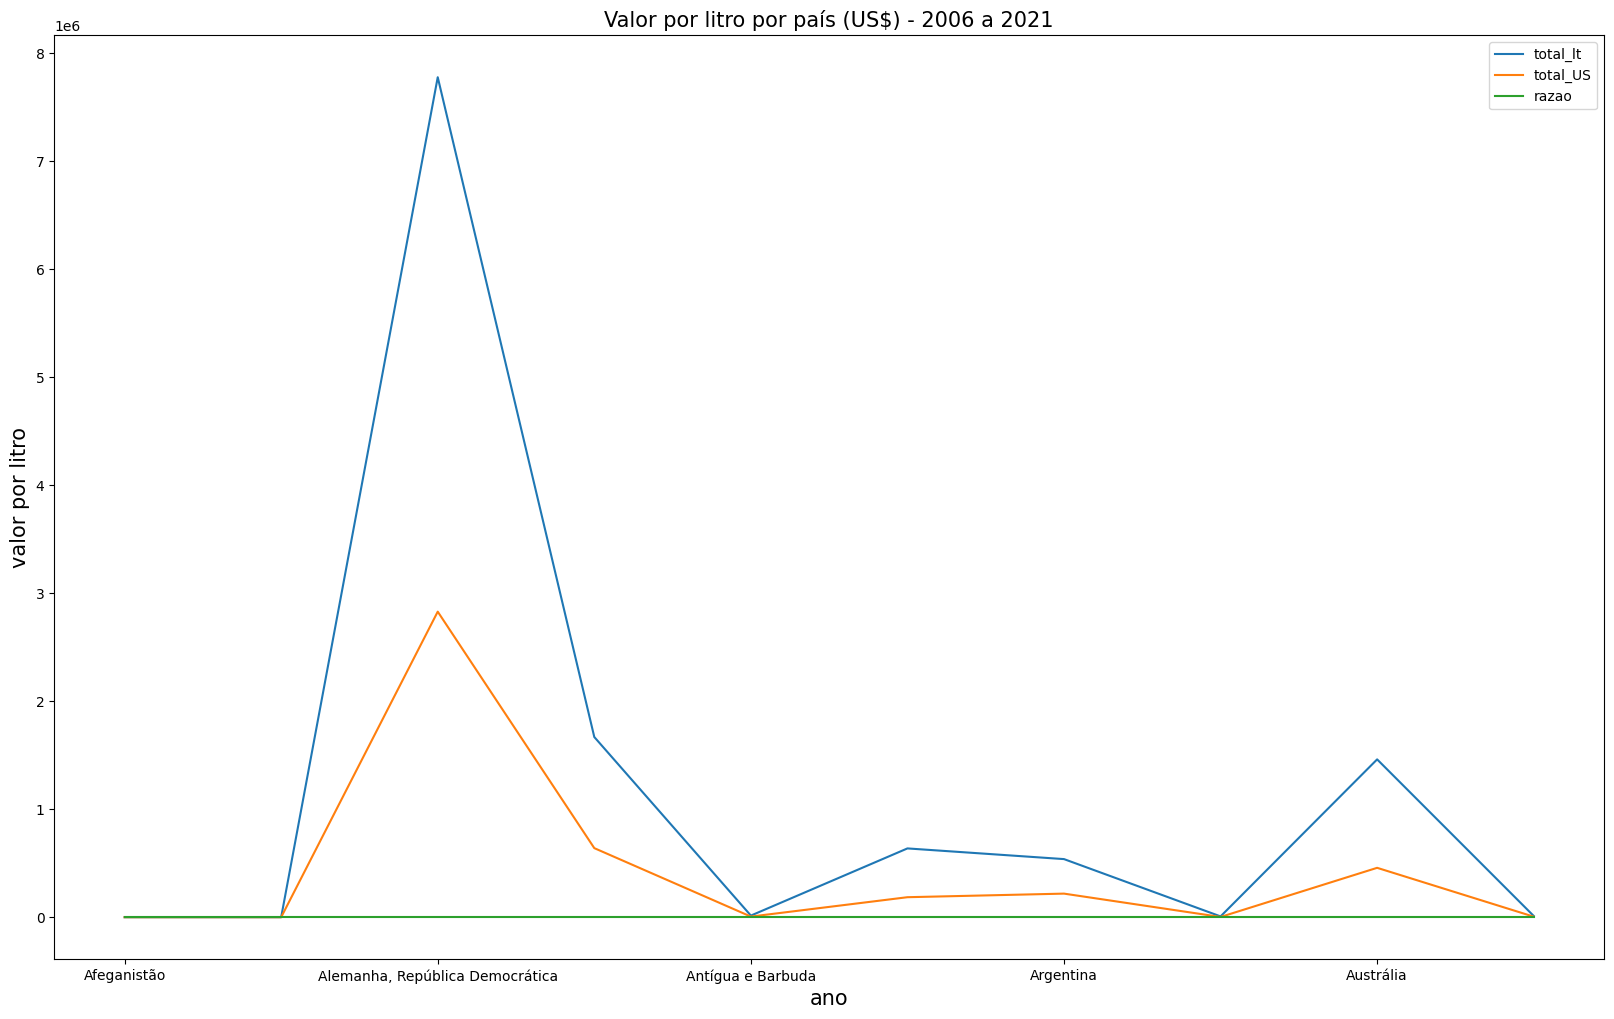

In [ ]:
ax = razao.head(10).plot(figsize=(20, 12))   #plotar gráfico e mudar Y label
ax.set_ylabel("valor por litro", fontsize=15)
ax.set_xlabel("ano", fontsize=15)
ax.set_title("Valor por litro por país (US$) - 2006 a 2021", fontsize=15)

In [ ]:
sns.lineplot(data=razao, x=razao, y=razao.index)

ValueError: ignored

#3. **Conclusões**

a. Apesar da maior quantidade em litros ser vendida para a Rússia, o maior montante vem do Paraguai. Vendemos mais caro pra eles ou o valor pode ter a ver com o câmbio?

b. A Rússia teve dois picos (provavelmente 2009 e 2013), quedas bruscas e estabilidade com valor baixo depois de 2014. Será que foram safras específicas ou períodos de eventos?

c. Ano de 2013 teve pico anormal na Rússia, o maior valor do gráfico todo. Poderia ser outlier? A quantidade (lt) exportada teve pico em 2009, mas não em 2013. Vendemos por um valor muito mais alto ou houve erro no registro do montante de 2013?

d. O Paraguai manteve valor baixo, com pouca alteração até 2013/2014, tendo bastante crescimento desde então, com pico em 2021. Acredito que tende a crescer.